## 목표
- 타이타닉 데이터를 학습해서 생존자/사망자를 예측해보자
- 머신러닝의 전체 과정을 진행해보자.

In [7]:
# 이미지를 넣는 라이브러리
from IPython.display import Image

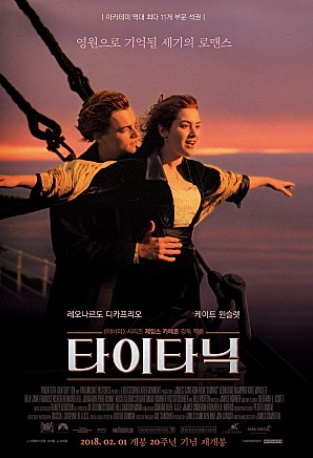

In [8]:
Image('https://www.gukjenews.com/news/photo/201912/1212183_991659_1921.jpg')

### 머신러닝 과정
- 문제정의
- 데이터 수집
- 데이터 전처리
- 탐색적 데이터 분석(EDA)
- 모델 선택 및 학습
- 모델 평가

### 1. 문제 정의
- 생존자/ 사망자를 예측
- Kaggle 경진대회에서 높은 순위를 차지
- 데이터를 토대로 생존율이 높은 승객, 생존율이 낮은 승객은 누구인지 판단


### 2. 데이터 수집
- kaggle 사이트로부터 train, test 다운로드

- 타이타닉 train데이터와 test데이터를 각각 변수 train, test에 저장하세요( 단, 인덱스는 Passengerid를 사용할 것)

In [9]:
# 라이브러리
import pandas as pd

In [10]:
# 데이터 불러오기
train = pd.read_csv('train.csv', index_col='PassengerId') # 컬럼중에 하나를 인덱스로 바꿀때
test = pd.read_csv('test.csv',index_col='PassengerId')

In [11]:
# 데이터 조회하기

# 최상단 데이터 확인하는 메소드
train.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [12]:
#최하단 데이터를 확인하는 메소드
train.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### 컬럼 설명

|컬럼|설명|비고|
|:---:|:-----------:|:-----------:|
|PassengerId|탑승객ID||
|Survived|생존여부|0 = 사망, 1 = 생존|
|Pclass|객실 등급 - 승객의 사회적, 경제적 지위|1st = Upper, 2nd = Middle, 3rd = Lower|
|Name|이름|이름 (결혼여부 등등..)|
|Sex|성별||
|Age|나이||
|SibSp|동반한 Sibling(형제자매)와 Spouse(배우자)의 수||
|Parch|동반한 Parent(부모) Child(자식)의 수||
|Ticket|티켓의 고유넘버||
|Fare|티켓의 요금||
|Cabin|객실 번호||
|Embarked|승선한 항|C = Cherbourg,Q = Queenstown,S = Southampton|

In [13]:
# 데이터의 크기 확인하기
print(train.shape)
print(test.shape)

(891, 11)
(418, 10)


In [14]:
# 컬럼 확인하기
print(train.columns)
print(test.columns)

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')


### 연습문제 1
- Embarked는 승객의 탑승항구를 나타내는 컬럼, 탑승 항구별 승객 데이터 분포를 확인

In [15]:
# .value_counts("컬럼이름") -> 컬럼이름의 데이터 개수 확인
train.value_counts("Embarked")

Embarked
S    644
C    168
Q     77
dtype: int64

In [16]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

###  연습문제 2
- 나이가 20살 이상 40살 미만인 승객
- Pclass가 1등급 혹은 2등급인 승객
- 열(Column)은 Survived, Pclass, Age, Fare만 나오게 출력
- 상위 10개의 데이터만 출력

In [17]:
# 내 답
# 나이가 20살이상 40살 미만인 승객
mask = (train['Age'] >=20) & (train['Age'] <40) & (train['Pclass'] <3)  
                                    
answer =train[mask]

answer[['Survived','Pclass','Age','Fare']].head(10)


,Survived,Pclass,Age,Fare
PassengerId,,,,
2,1,1,38.0,71.2833
4,1,1,35.0,53.1000
21,0,2,35.0,26.0000
22,1,2,34.0,13.0000
24,1,1,28.0,35.5000
35,0,1,28.0,82.1708
42,0,2,27.0,21.0000
54,1,2,29.0,26.0000
57,1,2,21.0,10.5000


In [18]:
# 선생님 답
cond1 = (train['Age'] >=20) & (train['Age'] <40)
cond2 = (train['Pclass'] ==1) | (train['Pclass'] ==2)

# cond1 & cond2 조건 -> 데이터명[필터링할조건]
# loc[행,열] -> 행 값에 cond1 & cond2 조건으로 인덱싱하고, 열 값에추출해낼 컬럼명
# train.loc[cond1 & cond2, 'Survived','Pclass','Age','Fare']  # -> 이러면 안됨
# 열 값에 하나의 데이터가 들어가야됨 -> 하나로 묶어야함
train.loc[cond1 & cond2, ['Survived','Pclass','Age','Fare']].head(10)

,Survived,Pclass,Age,Fare
PassengerId,,,,
2,1,1,38.0,71.2833
4,1,1,35.0,53.1000
21,0,2,35.0,26.0000
22,1,2,34.0,13.0000
24,1,1,28.0,35.5000
35,0,1,28.0,82.1708
42,0,2,27.0,21.0000
54,1,2,29.0,26.0000
57,1,2,21.0,10.5000


### 연습문제 3
- 나이가 30살 이상, 남자 승객 필터링
- Fare 를 많이 낸 순서대로 내림차순 정렬
- 상위 5개를 출력

# 판다스 데이터프레임 -> sort_values 사용
# 일반 리스트 -> sort

In [19]:
#답

cond1 = (train['Sex']=='male') &(train['Age']>=30)

train[cond1].sort_values(by='Fare', ascending=False).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
333,0,1,"Graham, Mr. George Edward",male,38.0,0,1,PC 17582,153.4625,C91,S
661,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.6500,NaN,S


## 데이터 전처리 및 데이터 탐색

In [20]:
# 데이터의 갯수, 데이터 타입을 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [21]:
# 타입 변환 -> .astype('변환할타입')
# Pclass는 데이터에비해 타입용량이 너무 큼 (int64 -> int32) 
# 메모리 공간을 아낄 수 있음
train['Pclass'] = train['Pclass'].astype('int32') # 변환 후 다시 선언을 해줘야함
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int32  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int32(1), int64(3), object(5)
memory usage: 80.1+ KB


In [22]:
# 각 컬럼에 대한 기술통계 확인
# .describe() : 수치형 컬럼의 통계를 기본으로 한다.
train.describe()
# object(문자열)로 되어있는 컬럼들은 빠져있고, 수치형으로된 컬럼만 확인가능

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [24]:
train.describe(include = 'object')
# top -> 최빈값 , 이름은 임의값이고, 다른것은 최빈값
# freq -> 최빈값에 대한 빈도

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [25]:
# 남성과 여성의 데이터 수를 확인
# .value_counts() : column별 값의 분포를 확인할 때 사용
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

### 결측치
- 결측치는 비어있는 데이터를 의미한다. 
1. 결측치 데이터 확인
2. 결측치 아닌 데이터 확인
3. 결측 데이터 채우기
4. 결측 데이터 제거하기

In [26]:
# 결측치 확인 - .isnull() , .isna() = 2개 모두 같은 함수임
# 컬럼별 결측치의 갯수를 확인하기 위해서는 sum() 함수를 붙여주면 된다.
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [27]:
train.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

### Age 결측치 채우기
- 다른 컬럼간의 상관관계를 이용해서 결측치를 채워보자
- Age 와 다른 컬럼간의 상관관계를 알아보자

In [28]:
# 경고 메시지 무시하기
import warnings
warnings.filterwarnings(action = 'ignore')

# corr() 메소드 : 각 컬럼간의 상관관계를 반환하는 메소드
# +1에 가까울수록 : 양의 상관관계가 높음
# -1에 가까울수록 : 음의 상관관계가 높음
# 0에 가까울수록 : 상관관계가 낮음
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


- Pclass가 생존에 가장 높은 상관관계를 갖는다.
- 생존에 관련이 많을 것 같은 성별을 그룹핑에 활용해보자.

In [29]:
# 피봇테이블 : 그룹핑할 때 사용
pt1 = train.pivot_table(values = 'Age' ,# values = 데이터로 사용할 열
                             index = ['Pclass','Sex'], # index = 행 위치에 들어갈 열
                             aggfunc = 'mean') # aggfunc = 데이터 집계함수 (여기서 mean-평균을 사용했는데 이거는 주관적일수 있음, max- 최대값..)
pt1

Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

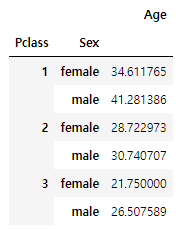
위 데이터 해석 : Pclass가 1이고, 여성인 나이는 평균 34.61 살이다

In [30]:
# Pclass 가 1이고 여성인 사람의 평균나이
pt1.loc[1, 'female' ]

Age    34.611765
Name: (1, female), dtype: float64

In [31]:
# Pclass가 3인 남성의 평균나이
pt1.loc[3,'male']

Age    26.507589
Name: (3, male), dtype: float64

In [32]:
import numpy as np

np.isnan(train.iloc[0]['Age']) # numpy라이브러리에서 지원하는 .isnan -> nan(결측치)이면 True

False

In [33]:
# 나이가 결측치인 경우 값을 담아주는 함수 정의
def fill_age(row) : # row 에 나중에 쓸 데이터의 행 값을 넣어주면 됨
    # 만약 나이가 결측치라면 피봇테이블에서 값을 리턴
    if np.isnan(row['Age']) : # np.isnan(row['Age']) = True 라면 (결측치라면)
        return pt1.loc[row['Pclass'],row['Sex']]
    # 만약 나이가 결측치가 아니라면 원래 나이값을 사용
    else :
        return row['Age']

In [34]:
# 함수 만들어서 적용 -> apply 메소드 사용
# axis 인자 = 0은 열 , 1은 행 으로 적용
train['Age'] = train.apply(fill_age, axis = 1).astype('int32')

In [35]:
# Age의 결측치가 채워져서 0으로 바뀜
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

### 테스트 데이터에도 결측치 채워주기

In [36]:
test['Age'] = test.apply(fill_age, axis = 1).astype('int32')

In [37]:
# test데이터에서도 age 결측치 채워줌
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

### Embarked 결측치 채우기

In [38]:
# Embarked의 각 데이터 분포
# 각각의 데이터가 몇개 있는지 확인 -> .value_counts()
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

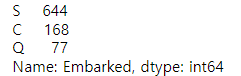
결측치를 가장 많은 값인 "S"로 채울것임

In [39]:
# 결측치가 있는 행을 확인하는 방법
train.loc[train['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80.0,B28,NaN


In [40]:
# 결측값을 원하는 값으로 변경하는 메소드 -> .fillna('변경하고자하는 값')
train['Embarked'] = train['Embarked'].fillna('S')

In [41]:
# 결측치가 있는 행을 확인하는 방법
train.loc[train['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


### Fare 채우기

In [42]:
# 상관관계 확인 -> .corr()메서드 : 특성 간의 상관관계를 확인하는 메서드
# 1이나 -1에 가까울수록 상관관계가 높음 / 0에 가까울수록 상관관계가 낮음
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.066538,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.410104,0.083081,0.018443,-0.549500
Age,-0.066538,-0.410104,1.000000,-0.251439,-0.178855,0.120173
SibSp,-0.035322,0.083081,-0.251439,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.178855,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.120173,0.159651,0.216225,1.000000


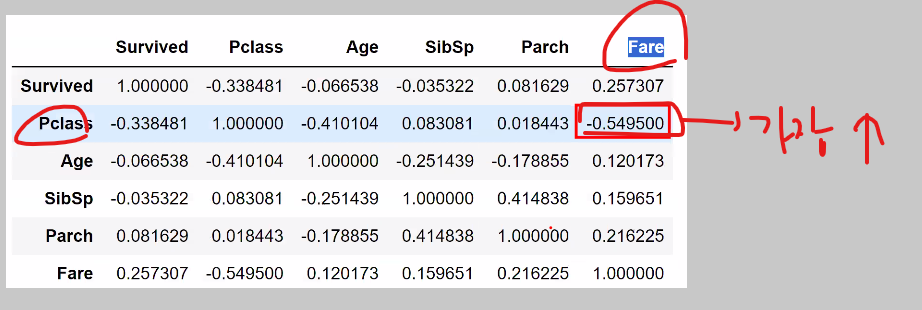

In [43]:
# pivot_table을 활용하여 'Pclass' 와 'Sex'을 인덱스로 그룹핑해보자
# 데이터 집계 함수는 mean 사용
pt2 = train.pivot_table(values = 'Fare' ,# values = 데이터로 사용할 열
                             index = ['Pclass','Sex'], # index = 행 위치에 들어갈 열
                             aggfunc = 'mean')
pt2

Fare
Pclass Sex               
1      female  106.125798
       male     67.226127
2      female   21.970121
       male     19.741782
3      female   16.118810
       male     12.661633

In [44]:
# test 데이터의 결측치 개수 확인
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [45]:
# train 데이터의 결측치 개수 확인
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [46]:
# train에서 결측치 행 출력
train[train['Fare'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


In [47]:
# test에서 결측치 행 출력
test[test['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60,0,0,3701,NaN,NaN,S


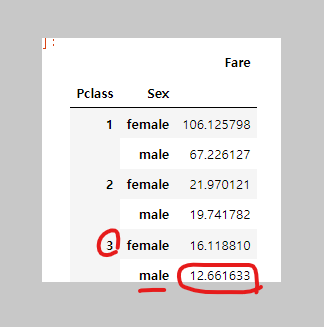

In [48]:
# Fare가 결측치인 사람은 Pclass가 3이고, 남성이기 때문에
# pt2에서 평균값을 대입하기 (12.661633)
# 결측값을 원하는 값으로 변경하는 메소드 -> .fillna('변경하고자하는 값')
test['Fare'] = test['Fare'].fillna(12.661633)
test[test['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,


### Cabin 채우기

In [49]:
train['Cabin']

PassengerId
1       NaN
2       C85
3       NaN
4      C123
5       NaN
       ... 
887     NaN
888     B42
889     NaN
890    C148
891     NaN
Name: Cabin, Length: 891, dtype: object

In [50]:
# 중복값을 제거한 데이터 출력 -> .unique()
train['Cabin'].unique()

# 데이터형태 -> 범주형 -> 너무 범위가 많아서 
# 범주 통일화 -> C85, C123 -> C로 통일
# 결측치를 특정 범주 'M'으로 채우기

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [51]:
# 결측치에는 'M'을 대입
# 'Deck' 이라는 새로운 컬럼을 생성하고 Cabin 값을 대입하고
# 새로운 컬럼 생성 -> 데이터프레임['생성하고자 하는 컬럼명'] = 넣고자하는 값
train['Deck']=train['Cabin'].fillna('M')
test['Deck']=test['Cabin'].fillna('M')

In [52]:
# 'Deck' 이라는 컬럼에서 맨 앞 알파벳 한글자만 가져오기
# 방법 1
temp = []
for row in train['Deck'] :
    temp.append(row[0])
train['Deck'] = temp
train['Deck']

PassengerId
1      M
2      C
3      M
4      C
5      M
      ..
887    M
888    B
889    M
890    C
891    M
Name: Deck, Length: 891, dtype: object

In [53]:
# 'Deck' 이라는 컬럼에서 맨 앞 알파벳 한글자만 가져오기
# 방법 2
# 문자열로 변환 후, 맨 앞글자만 가져오기 
# ( 현재 데이터는 문자열 형태가 아니기때문에 바로 인덱싱하면 오류)
# train['Deck'] -> 지금 시리즈 형태의 데이터 
train['Deck'].str[0]
test['Deck'].str[0]

PassengerId
892     M
893     M
894     M
895     M
896     M
       ..
1305    M
1306    C
1307    M
1308    M
1309    M
Name: Deck, Length: 418, dtype: object

In [54]:
# 맨 앞 알파벳 한글자를 'Deck'컬럼에 대입
train['Deck'] = train['Deck'].str[0]
test['Deck'] = test['Deck'].str[0]

In [55]:
train['Deck']

PassengerId
1      M
2      C
3      M
4      C
5      M
      ..
887    M
888    B
889    M
890    C
891    M
Name: Deck, Length: 891, dtype: object

In [56]:
test['Deck']

PassengerId
892     M
893     M
894     M
895     M
896     M
       ..
1305    M
1306    C
1307    M
1308    M
1309    M
Name: Deck, Length: 418, dtype: object

In [57]:
# Deck 컬럼이 있으니
# Cabin 컬럼 삭제하기 : drop 메소드 활용 -> axis 축을 설정 => .drop('컬럼명', axis=1)
# axis 축 => 0 : 행/ 1 : 컬럼 (열)
# axis 기본값은 0으로되있어서 drop('Cabin') 으로만 하면 삭제가되지않음

# 행값을 삭제할때는 .drop('인덱스명', axis=0)

# 삭제 후 재대입을 해주거나
# train = train.drop('Cabin' , axis = 1)
# test = test.drop('Cabin', axis = 1)

# inplace 이용! 값을 바꾼후 재대입할 필요 없음
train.drop('Cabin' , axis = 1, inplace = True)
test.drop('Cabin', axis = 1, inplace = True)

In [58]:
test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,Q,M
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,S,M
894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,Q,M
895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,S,M
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,S,M
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,26,0,0,A.5. 3236,8.0500,S,M
1306,1,"Oliva y Ocana, Dona. Fermina",female,39,0,0,PC 17758,108.9000,C,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38,0,0,SOTON/O.Q. 3101262,7.2500,S,M


In [59]:
# 결측치 있는지 확인
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int32  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int32  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
 10  Deck      891 non-null    object 
dtypes: float64(1), int32(2), int64(3), object(5)
memory usage: 76.6+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age    

### 데이터 탐색
- 범주형 데이터 탐색
1. Deck 시각화

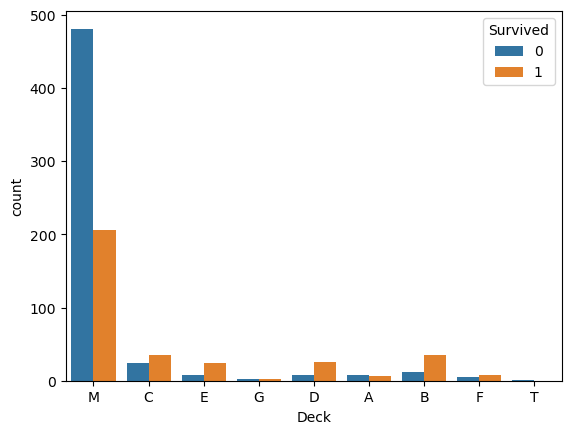

In [60]:
# Deck의 데이터에 따른 생존 사망 바 그래프를 그려보기
# countplot : 범주형 데이터의 빈도 수를 차트 바로 표시

# seaborn 사용 라이브러리
import seaborn as sns
# 그래프 라이브러리
import matplotlib.pyplot as plt

sns.countplot(data = train, x = 'Deck', hue = 'Survived') # hue - 어떤 빈도수를 사용할지
plt.show()

- M에서 상대적으로 사람이 많이 죽었다.
- 생존 여부 판단에 활용해도 괜찮겠다.

### Pclass 시각화

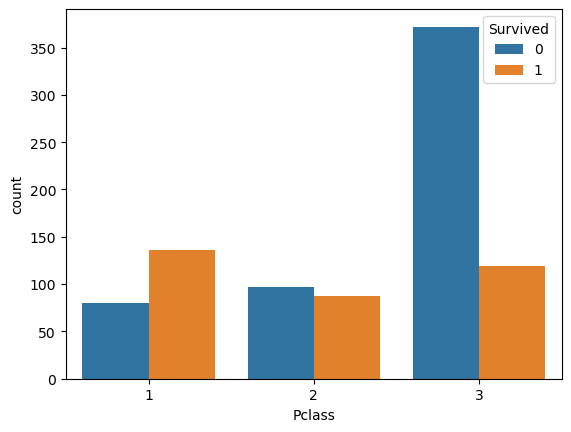

In [61]:
# Pclass에 따른 생존 여부 빈도 수를 차트바 로 시각화하기
sns.countplot(data = train, x = 'Pclass', hue = 'Survived')
plt.show()

- 3등급의 사람들이 많이 죽었다

### Deck과 Pclass 동시에 시각화

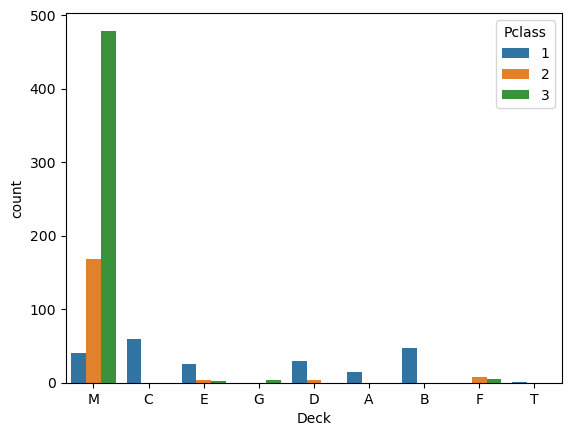

In [62]:
sns.countplot(data=train, x='Deck', hue='Pclass')
plt.show()

### 예제
- 성별에 따른 생존 빈도를 바 차트로 시각화하기

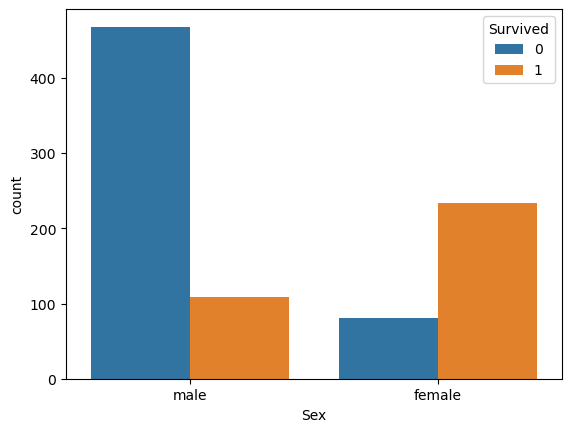

In [63]:
sns.countplot(data=train, x='Sex', hue='Survived')
plt.show()

- 승선항에 따른 생존빈도를 시각화하기

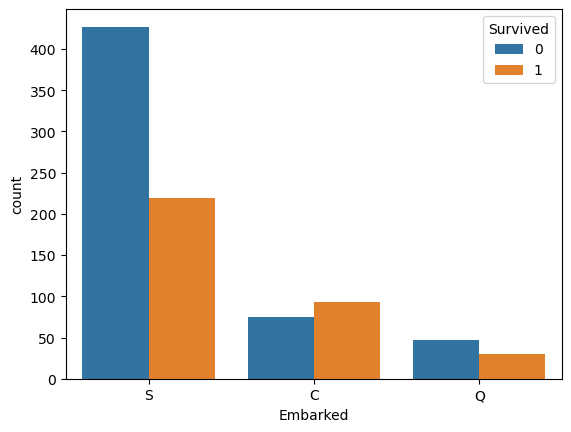

In [64]:
sns.countplot(data = train, x='Embarked', hue='Survived')
plt.show()

### 수치형 데이터
1. Age 시각화

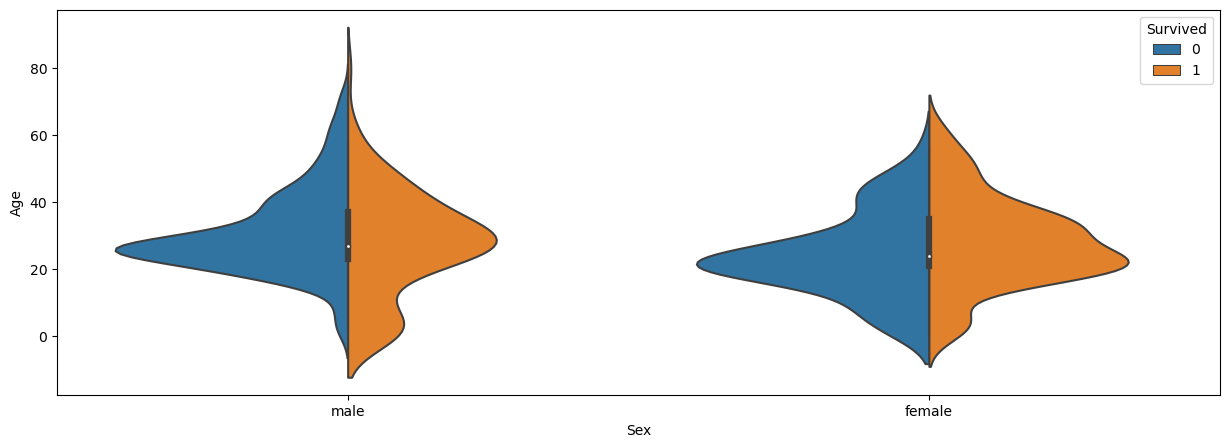

In [65]:
# violinplot 이라는 그래프 그려보기
plt.figure(figsize = (15,5)) # 사이즈 키우기
sns.violinplot(data = train,
                  x = 'Sex',
                  y = 'Age',
                  hue = 'Survived',
                  split = True)
plt.show()

- 20~40대 사이가 사망률이 가장 높게 나타나고
- 어린아이 중에서는 남자아이가 여자아이에 비해 많이 생존하였다.

2. Fare 시각화

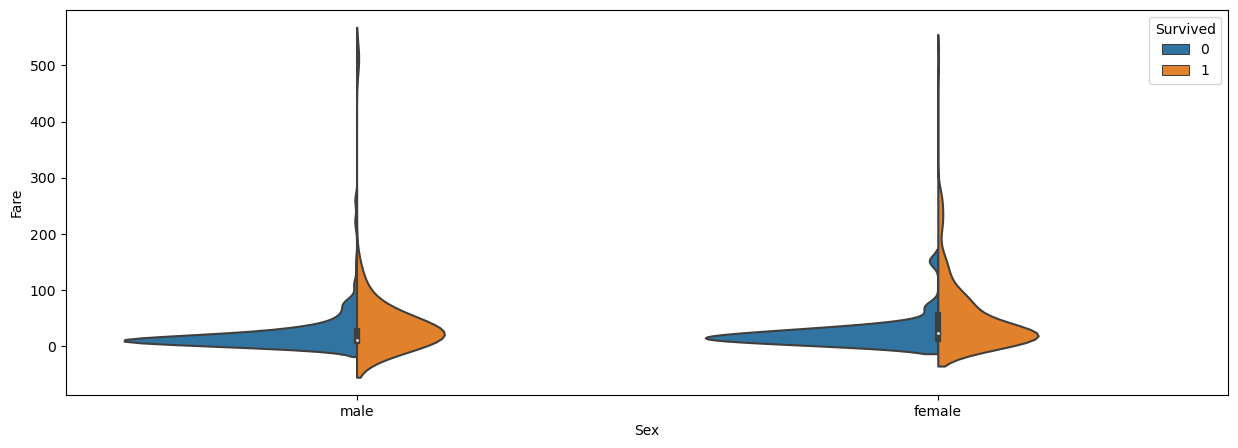

In [66]:
# violinplot 그리기
plt.figure(figsize = (15,5)) # 사이즈 키우기
# x = 'Sex' , y = 'Fare' , hue = 'Survived'
sns.violinplot(data = train, x = 'Sex' , y = 'Fare' , hue = 'Survived', split=True)
plt.show()


- 요금이 저렴한 사람은 상대적으로 생존율이 낮다.

### Parch, Sibsp - 부모자식, 형제배우자
- 특성공학 : Parch와 Sibsp를 더해서 가족의 숫자라는 새로운 컬럼 생성

In [67]:
# Family_Size 라는 새로운 컬럼을 생성
# Parch와 SibSp을 더한 값을 Family_Size에 담기

train['Family_Size'] =  train['Parch'] + train['SibSp'] +1 # 본인이 빠졌으니 +1
# train['Parch'] -> 시리즈 데이터 형태
# 시리즈에서의 연산 -> 시리즈 +1 => 각 요소들마다 +1이됨
test['Family_Size'] =  test['Parch'] + test['SibSp'] +1

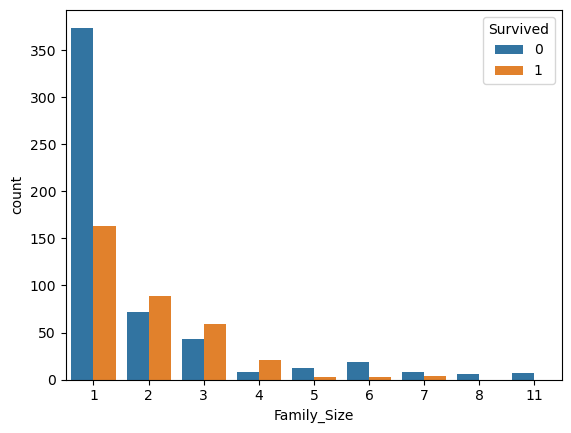

In [68]:
# Family_Size에 따른 생존 빈도 수를 시각화해보자
sns.countplot(data = train, x='Family_Size' , hue='Survived')
plt.show()

- 1명일 때는 사망 비율이 높고, 2~4인 경우 생존비율이 높고, 5명 이상인 경우 사망 비율이 높다.
- binning(사소한 관찰오류의 영향을 줄여줄 수 있다.)
- 가족사이즈가 1이면 Alone, 2~4 이면 Small, 5이상이면 Large

In [69]:
# 카데고리화 함수 pd.cut
bins = [0,1,4,11]  # 범위 지정
labels = ['Alone', 'Small', 'Large'] # 라벨 지정
train['Family_Group'] = pd.cut(train['Family_Size'], bins = bins , labels = labels)
test['Family_Group'] = pd.cut(test['Family_Size'], bins = bins , labels = labels)


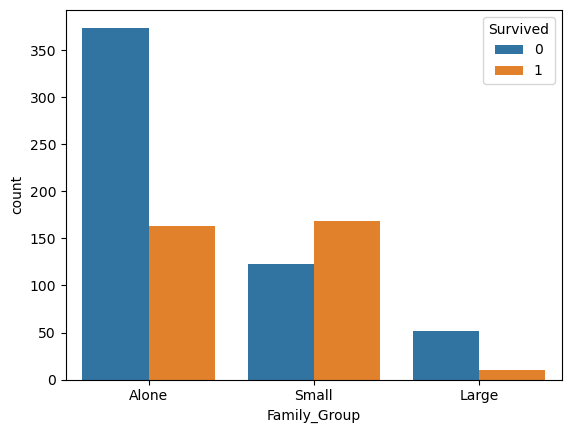

In [70]:
# Family_Group에 따른 생존 빈도 수를 시각화하기
sns.countplot(data=train, x='Family_Group', hue='Survived')
plt.show()

### Text 데이터 다루기
1. Name 시각화
- 중간 호칭만 추출하자

In [71]:
# 문자열.split('구분자', 분할횟수)
# 문자열.split(sep='구분자', maxsplit=분할횟수)
# 구분자 기본값 = " " / 분할횟수 =1
# .split() ->공백을 기준으로 1번 분할

# .strip() -> 양쪽 공백을 없애줌

train['Name'][1].split(',')[1].split('.')[0].strip()

# 해당 데이터에서 'Mr' 호칭만 추출하기
# train['Name'][1].split()[1]


'Mr'

In [72]:
# 방법 1
# row['Name']으로 해서 ['Name'] 으로 인덱싱하는 자체를 함수로 정의 할 수 있고

# 중간 호칭을 추출해주는 함수 정의
def split_title(row):
    """이름의 중간 호칭을 리턴"""
    return row['Name'].split(',')[1].split('.')[0].strip()

# 정의한 함수를 적용하는 메소드 -> .apply
train.apply(split_title, axis=1)

PassengerId
1        Mr
2       Mrs
3      Miss
4       Mrs
5        Mr
       ... 
887     Rev
888    Miss
889    Miss
890      Mr
891      Mr
Length: 891, dtype: object

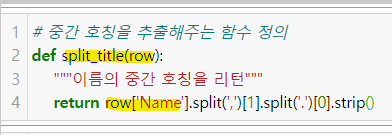
train['Name'] 이 아니라 row['Name']

In [73]:
# 방법 2
# row으로 해서 row를 train의 한 열로 지정해서 함수를 적용할때 ['Name']을 따로 지정할 수 있음

# 중간 호칭을 추출해주는 함수 정의
def split_title2(row):
    """이름의 중간 호칭을 리턴"""
    return row.split(',')[1].split('.')[0].strip()

# 정의한 함수를 적용하는 메소드 -> .apply

#  이때 여기서는 train['Name']이 시리즈 자료형(1차원이여서 행, 열이 없음)이기때문에 axis 축 설정X
train['Name'].apply(split_title2)

PassengerId
1        Mr
2       Mrs
3      Miss
4       Mrs
5        Mr
       ... 
887     Rev
888    Miss
889    Miss
890      Mr
891      Mr
Name: Name, Length: 891, dtype: object

In [74]:
train['Name'].apply(split_title2).unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [75]:
# 위 데이터를 'Title' 이라는 새로운 컬럼을 생성하여 해당 값을 대입
train['Title'] = train['Name'].apply(split_title2)
test['Title'] = test['Name'].apply(split_title2)

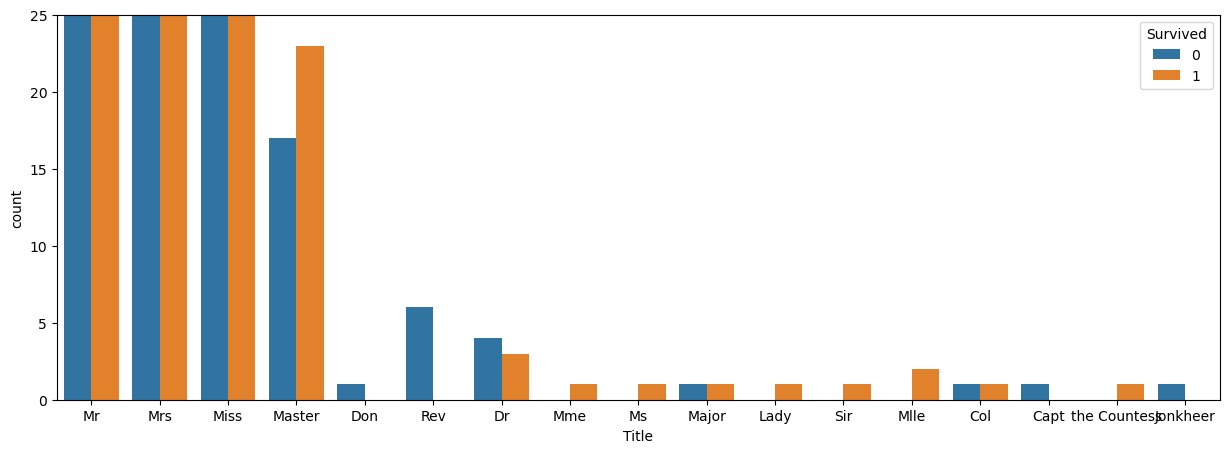

In [76]:
# 중간 호칭별로 생존 빈도수를 막대그래프로 시각화

# 차트 크기 키우기
plt.figure(figsize=(15,5))
sns.countplot(data=train, x='Title' , hue='Survived')

# y 축 범위 설정
plt.ylim(0,25)

plt.show()

- Master : 결혼하지 않은 남성, 주로 청소년 이하
- Rev : 목사님 (6명 모두 사망)
- Don과 Mme ~ Jonkheer : Other
- 범주 : Mr Mrs Miss Master Rev Other 로 묶어줄거다

In [77]:
train['Title'].unique()
# Don과 Rev의 순서를 바꿔준다음에, Don부터 끝까지를 Other로 묶어줄거다

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [78]:
# Don과 Rev 순서를 바꾼 리스트 생성
title = ['Mr', 'Mrs', 'Miss', 'Master', 'Rev', 'Don', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer']

In [79]:
len(title)

17

In [80]:
# 우리가 바꿔줄 내용을 담는 리스트 생성
conver_title = ['Mr', 'Mrs', 'Miss', 'Master', 'Rev'] + ['Other'] * 12
conver_title

['Mr',
 'Mrs',
 'Miss',
 'Master',
 'Rev',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other']

In [81]:
# 값 확인
# 딕셔너리 형태 함수 -> dict
# 묶어주는 함수 -> zip
title_dict = dict(zip(title, conver_title))
title_dict

{'Mr': 'Mr',
 'Mrs': 'Mrs',
 'Miss': 'Miss',
 'Master': 'Master',
 'Rev': 'Rev',
 'Don': 'Other',
 'Dr': 'Other',
 'Mme': 'Other',
 'Ms': 'Other',
 'Major': 'Other',
 'Lady': 'Other',
 'Sir': 'Other',
 'Mlle': 'Other',
 'Col': 'Other',
 'Capt': 'Other',
 'the Countess': 'Other',
 'Jonkheer': 'Other'}

In [82]:
# test에 Dona라는 데이터가 있으니
test['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [83]:
# 딕셔너리에 값 넣기  key에 Dona, value에 Other
title_dict['Dona'] = 'Other'

In [84]:
train['Title'] =train['Title'].map(title_dict)

In [85]:
test['Title'] =test['Title'].map(title_dict)

In [86]:
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other', 'Rev'], dtype=object)

In [87]:
test['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other', 'Rev'], dtype=object)

In [88]:
# train과 test에서 Name 컬럼 삭제하기
# drop 메서드 사용
train.drop('Name' , axis = 1, inplace = True)
test.drop('Name' , axis = 1, inplace = True)

### 티켓 
- 분석하기에 의미있는 데이터로 보기 어려움
- 컬럼 삭제하기

In [89]:
train['Ticket'].head()

PassengerId
1           A/5 21171
2            PC 17599
3    STON/O2. 3101282
4              113803
5              373450
Name: Ticket, dtype: object

In [90]:
# train과 test데이터 Ticket 컬럼 삭제하기
train.drop('Ticket', axis=1, inplace=True)
test.drop('Ticket', axis=1, inplace=True)

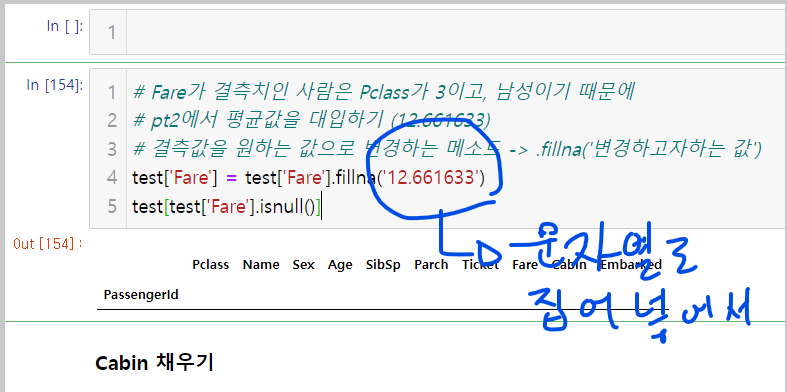
위에서 Fare에 문자열 타입을 넣어버려서 object로 바뀌어버림
다시 float 타입으로 바꿔줬음
다시 위에는 숫자형으로 바꿔줫음

In [91]:
test['Fare'] = test['Fare'].astype('float64')
train['Fare'] = train['Fare'].astype('float64')

### 범주형 데이터 인코딩

In [92]:
# 문제와 답 데이터로 분리하기
# X_train(훈련용 문제) / y_train(훈련용 답) / X_test (테스트용 문제) , y_test는 없음(test 데이터에는 Survived가 없음)
X_train = train.loc[ : , 'Pclass':] # =  train.drop('Survived', axis = 1)
y_train = train.loc[ : , 'Survived'] # =  y_train = train['Survived'] 

X_test = test

In [93]:
# X_train 원핫인코딩 진행하기
# pd.get_dummies() 메소드 활용
X_train=pd.get_dummies(X_train)
X_train

,Pclass,Age,SibSp,Parch,Fare,Family_Size,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,Deck_T,Family_Group_Alone,Family_Group_Small,Family_Group_Large,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Title_Rev
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,3,22,1,0,7.2500,2,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,1,38,1,0,71.2833,2,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
3,3,26,0,0,7.9250,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,1,35,1,0,53.1000,2,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
5,3,35,0,0,8.0500,1,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,2,27,0,0,13.0000,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
888,1,19,0,0,30.0000,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
889,3,21,1,2,23.4500,4,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [94]:
# X_test 원핫인코딩

# 인코딩 잘됐나 보고
pd.get_dummies(X_test)

# 그 다음 재대입
X_test = pd.get_dummies(X_test)
X_test

,Pclass,Age,SibSp,Parch,Fare,Family_Size,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,Deck_M,Family_Group_Alone,Family_Group_Small,Family_Group_Large,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Title_Rev
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,3,34,0,0,7.8292,1,0,1,0,1,...,1,1,0,0,0,0,1,0,0,0
893,3,47,1,0,7.0000,2,1,0,0,0,...,1,0,1,0,0,0,0,1,0,0
894,2,62,0,0,9.6875,1,0,1,0,1,...,1,1,0,0,0,0,1,0,0,0
895,3,27,0,0,8.6625,1,0,1,0,0,...,1,1,0,0,0,0,1,0,0,0
896,3,22,1,1,12.2875,3,1,0,0,0,...,1,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,26,0,0,8.0500,1,0,1,0,0,...,1,1,0,0,0,0,1,0,0,0
1306,1,39,0,0,108.9000,1,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
1307,3,38,0,0,7.2500,1,0,1,0,0,...,1,1,0,0,0,0,1,0,0,0


In [95]:
X_train.shape

(891, 29)

In [96]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Pclass              418 non-null    int64  
 1   Age                 418 non-null    int32  
 2   SibSp               418 non-null    int64  
 3   Parch               418 non-null    int64  
 4   Fare                418 non-null    float64
 5   Family_Size         418 non-null    int64  
 6   Sex_female          418 non-null    uint8  
 7   Sex_male            418 non-null    uint8  
 8   Embarked_C          418 non-null    uint8  
 9   Embarked_Q          418 non-null    uint8  
 10  Embarked_S          418 non-null    uint8  
 11  Deck_A              418 non-null    uint8  
 12  Deck_B              418 non-null    uint8  
 13  Deck_C              418 non-null    uint8  
 14  Deck_D              418 non-null    uint8  
 15  Deck_E              418 non-null    uint8  
 16  Deck_

In [97]:
X_test.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Family_Size', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Deck_A',
       'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M',
       'Family_Group_Alone', 'Family_Group_Small', 'Family_Group_Large',
       'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Other',
       'Title_Rev'],
      dtype='object')

In [98]:
# 컬럼의 차이를 확인하는 방법
set(X_train.columns) - set(X_test.columns)

{'Deck_T'}

In [99]:
X_test['Deck_T'] = 0

In [100]:
set(X_train.columns) - set(X_test.columns)

set()

In [101]:
print(X_train.shape)
print(X_test.shape)

(891, 29)
(418, 29)


### X_train과 X_test의 컬럼 순서 맞추기

In [102]:
X_test = X_test[X_train.columns] # X_test 컬럼 순서를 X_train 컬럼 순서로 맞추기
X_test

,Pclass,Age,SibSp,Parch,Fare,Family_Size,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,Deck_T,Family_Group_Alone,Family_Group_Small,Family_Group_Large,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Title_Rev
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,3,34,0,0,7.8292,1,0,1,0,1,...,0,1,0,0,0,0,1,0,0,0
893,3,47,1,0,7.0000,2,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
894,2,62,0,0,9.6875,1,0,1,0,1,...,0,1,0,0,0,0,1,0,0,0
895,3,27,0,0,8.6625,1,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
896,3,22,1,1,12.2875,3,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,26,0,0,8.0500,1,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
1306,1,39,0,0,108.9000,1,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
1307,3,38,0,0,7.2500,1,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0


In [103]:
X_test.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Family_Size', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Deck_A',
       'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M',
       'Deck_T', 'Family_Group_Alone', 'Family_Group_Small',
       'Family_Group_Large', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Other', 'Title_Rev'],
      dtype='object')

In [104]:
X_train.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Family_Size', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Deck_A',
       'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M',
       'Deck_T', 'Family_Group_Alone', 'Family_Group_Small',
       'Family_Group_Large', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Other', 'Title_Rev'],
      dtype='object')

   ### 모델 선택 및 학습

In [105]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

### DecisionTree 모델

In [106]:
# 모델 생성
tree_model = DecisionTreeClassifier(max_depth=5)

In [107]:
# 모델 학습
tree_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [108]:
# 모델 예측
pre = tree_model.predict(X_test)
pre

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [109]:
# gender_submission 파일 불러오기
result=pd.read_csv('gender_submission.csv') # 이 데이터의 Survived는 답이 아니라 임의의 값임 -> 우리가 예측한 pre 값으로 바꿔줘야함

result

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [110]:
# 우리가 예측한 pre 값으로 바꿔주기
result['Survived'] = pre
result

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [111]:
# 케글 사이트로 업로드하기 위해 다시 csv 파일로 변환 
# index 값을 없애야됨 -> index = False
result.to_csv('tree_model.csv' , index = False)

In [112]:
# 교차 검증 -> 하는 이유 : 테스트에 넣기 전에 우리가 갖고있는 모델의 성능을 미리 확인,
#              -> 우리가 갖고있는 모델이 얼마나 안정적으로 학습을 했는지 확인
result = cross_val_score(tree_model,
                    X_train,
                    y_train,
                    cv = 5) # cv = 5 -> 5겹으로 교차검증

# 5번의 검증 결과의 평균값
result.mean()

0.8069863787583957

### KNN 모델

In [113]:
# 모델 생성
knn_model=KNeighborsClassifier()

In [114]:
# 모델 학습
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [115]:
# 모델 예측
pre2 = knn_model.predict(X_test)
pre2

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [116]:
# 답안지 가져오기
result = pd.read_csv('gender_submission.csv')
result

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [117]:
# 우리가 예측한 값으로 채우기
result['Survived'] = pre2
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [118]:
# csv 파일로 변환
result.to_csv('knn_model.csv' , index = False)

In [119]:
# 교차 검증
result2 = cross_val_score(knn_model,
               X_train,
               y_train,
               cv =5)

result2.mean()

0.7284288494130939

- KNN 모델 성능이 너무 낮게 나와 Feature Scaling 적용하기
- 늦게 나온 이유 : 스케일이 안맞아서

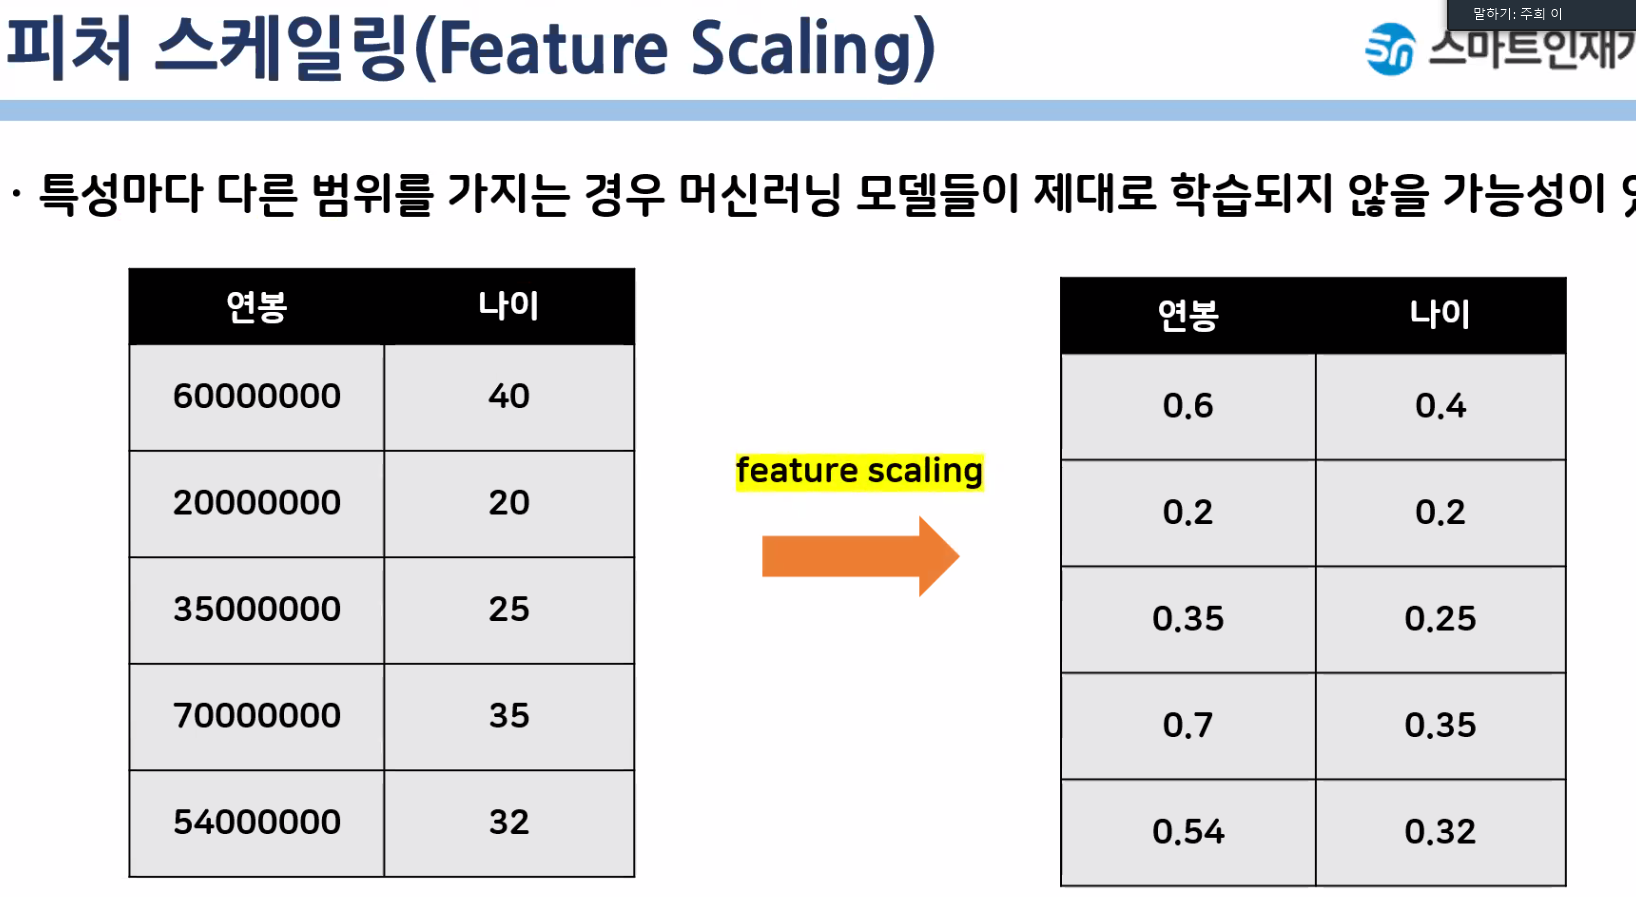
- 연봉과 나이를 비슷한 스케일로 맞춰줌으로써 머신러닝의 예측의 성능을 높힌다
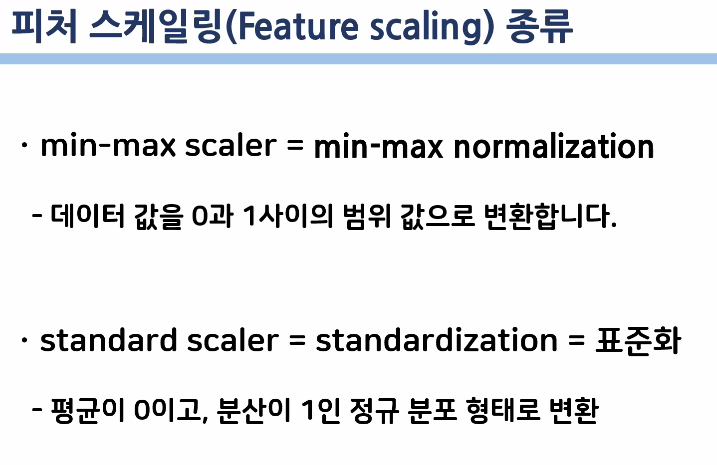
- min-max : 최소값과 최대값을 0과 1로 두고 데이터들을 그 사이 범위로 변환
- standard scaler : 평균 0 , 분산 1 정규분포로 변환

###  min-max scaler
: 변환하려는 데이터 - 최소값 / 최대값 -최소값
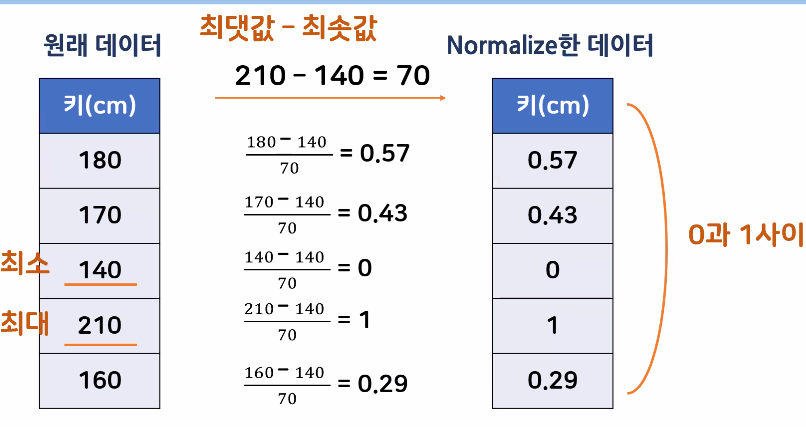
### standard scaler
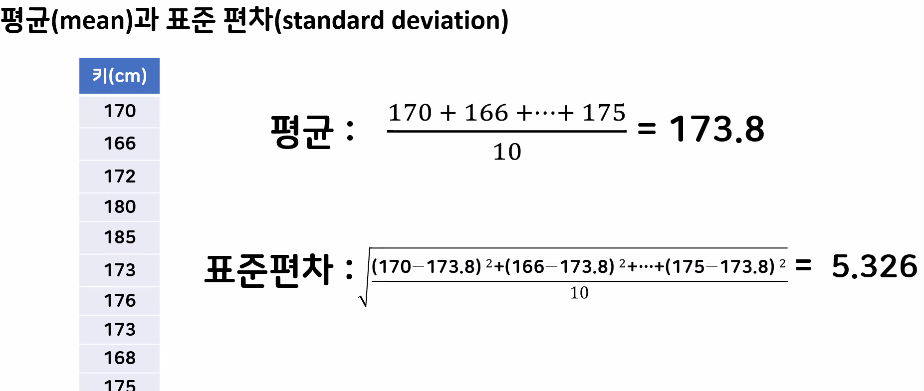
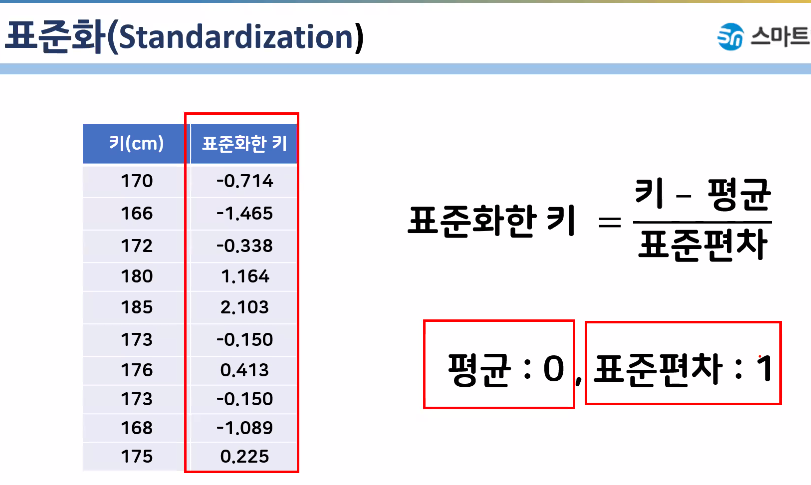
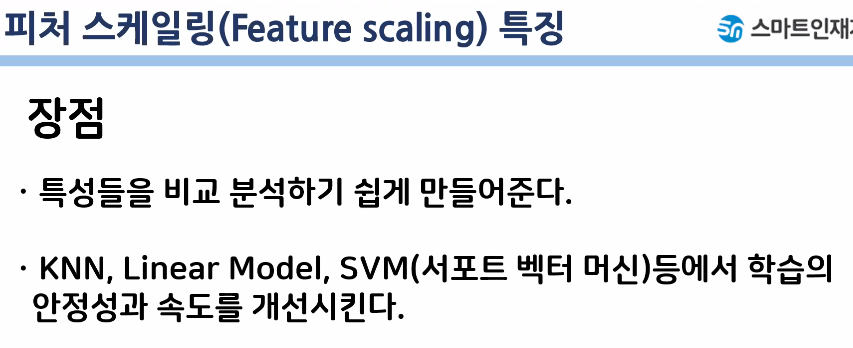

### min-max scaler 적용하기

In [120]:
from sklearn.preprocessing import MinMaxScaler

In [121]:
mm_scaler = MinMaxScaler()

In [122]:
# 스케일 조정
mm_scaler.fit(X_train)

MinMaxScaler()

In [123]:
mm_transform_X_train = mm_scaler.transform(X_train)
mm_transform_X_train

array([[1.    , 0.275 , 0.125 , ..., 0.    , 0.    , 0.    ],
       [0.    , 0.475 , 0.125 , ..., 1.    , 0.    , 0.    ],
       [1.    , 0.325 , 0.    , ..., 0.    , 0.    , 0.    ],
       ...,
       [1.    , 0.2625, 0.125 , ..., 0.    , 0.    , 0.    ],
       [0.    , 0.325 , 0.    , ..., 0.    , 0.    , 0.    ],
       [1.    , 0.4   , 0.    , ..., 0.    , 0.    , 0.    ]])

In [124]:
X_train.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Family_Size', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Deck_A',
       'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M',
       'Deck_T', 'Family_Group_Alone', 'Family_Group_Small',
       'Family_Group_Large', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Other', 'Title_Rev'],
      dtype='object')

In [125]:
# .describe를 사용하려면 dataframe으로 변환을해줘야함, 이때 컬럼들은 X_train의 컬럼들을 그대로 사용
mm_transform_X_train = pd.DataFrame(mm_transform_X_train, columns = X_train.columns)
mm_transform_X_train

,Pclass,Age,SibSp,Parch,Fare,Family_Size,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,Deck_T,Family_Group_Alone,Family_Group_Small,Family_Group_Large,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Title_Rev
0,1.0,0.2750,0.125,0.000000,0.014151,0.1,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.4750,0.125,0.000000,0.139136,0.1,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.3250,0.000,0.000000,0.015469,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.4375,0.125,0.000000,0.103644,0.1,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.4375,0.000,0.000000,0.015713,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.5,0.3375,0.000,0.000000,0.025374,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
887,0.0,0.2375,0.000,0.000000,0.058556,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
888,1.0,0.2625,0.125,0.333333,0.045771,0.3,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
889,0.0,0.3250,0.000,0.000000,0.058556,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [126]:
mm_transform_X_train.describe()

,Pclass,Age,SibSp,Parch,Fare,Family_Size,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,Deck_T,Family_Group_Alone,Family_Group_Small,Family_Group_Large,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Title_Rev
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.654321,0.364899,0.065376,0.063599,0.062858,0.090460,0.352413,0.647587,0.188552,0.086420,...,0.001122,0.602694,0.327722,0.069585,0.044893,0.204265,0.580247,0.140292,0.023569,0.006734
std,0.418036,0.166420,0.137843,0.134343,0.096995,0.161346,0.477990,0.477990,0.391372,0.281141,...,0.033501,0.489615,0.469646,0.254589,0.207186,0.403390,0.493796,0.347485,0.151787,0.081830
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.262500,0.000000,0.000000,0.015440,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.325000,0.000000,0.000000,0.028213,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.450000,0.125000,0.000000,0.060508,0.100000,1.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


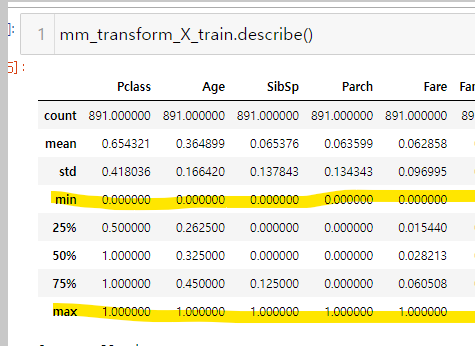

In [127]:
# X_test에 min-max scaler 적용

# 스케일 조정 은 이미 했으니 안해도 된다고함
# mm_scaler.fit(X_test)

In [128]:
mm_transform_X_test = mm_scaler.transform(X_test)
mm_transform_X_test

array([[1.    , 0.425 , 0.    , ..., 0.    , 0.    , 0.    ],
       [1.    , 0.5875, 0.125 , ..., 1.    , 0.    , 0.    ],
       [0.5   , 0.775 , 0.    , ..., 0.    , 0.    , 0.    ],
       ...,
       [1.    , 0.475 , 0.    , ..., 0.    , 0.    , 0.    ],
       [1.    , 0.325 , 0.    , ..., 0.    , 0.    , 0.    ],
       [1.    , 0.325 , 0.125 , ..., 0.    , 0.    , 0.    ]])

In [129]:
mm_transform_X_test = pd.DataFrame(mm_transform_X_test, columns = X_test.columns)
mm_transform_X_test

,Pclass,Age,SibSp,Parch,Fare,Family_Size,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,Deck_T,Family_Group_Alone,Family_Group_Small,Family_Group_Large,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Title_Rev
0,1.0,0.4250,0.000,0.000000,0.015282,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.5875,0.125,0.000000,0.013663,0.1,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.5,0.7750,0.000,0.000000,0.018909,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.3375,0.000,0.000000,0.016908,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.2750,0.125,0.166667,0.023984,0.2,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1.0,0.3250,0.000,0.000000,0.015713,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
414,0.0,0.4875,0.000,0.000000,0.212559,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
415,1.0,0.4750,0.000,0.000000,0.014151,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
416,1.0,0.3250,0.000,0.000000,0.015713,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [130]:
mm_transform_X_test.describe()

,Pclass,Age,SibSp,Parch,Fare,Family_Size,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,Deck_T,Family_Group_Alone,Family_Group_Small,Family_Group_Large,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Title_Rev
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,...,418.0,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,0.632775,0.367972,0.055921,0.065391,0.069432,0.083971,0.363636,0.636364,0.244019,0.110048,...,0.0,0.605263,0.346890,0.047847,0.050239,0.186603,0.574163,0.172249,0.011962,0.004785
std,0.420919,0.162094,0.112095,0.163571,0.109015,0.151907,0.481622,0.481622,0.430019,0.313324,...,0.0,0.489380,0.476551,0.213698,0.218700,0.390059,0.495062,0.378049,0.108844,0.069088
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.262500,0.000000,0.000000,0.015412,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.325000,0.000000,0.000000,0.028213,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.450000,0.125000,0.000000,0.061429,0.100000,1.000000,1.000000,0.000000,0.000000,...,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,0.950000,1.000000,1.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [131]:
# 교차검증 -> cross_val_score

# croos_val_score(어떤 모델로 검증, 스케일링 조정한 모델, 답, cv=몇번검증할지)

result = cross_val_score(knn_model,
                    mm_transform_X_train,
                    y_train,
                    cv=5)
result.mean()

0.8058439520431863

In [146]:
# 훈련
knn_model.fit(mm_transform_X_train,y_train)

KNeighborsClassifier()

In [133]:
# 예측
# 주의) 예측할때도 스케일 조정이 된 X_test를 넣어줘야함mm_transform_X_test
pre = knn_model.predict(mm_transform_X_test)
pre

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [134]:
# 케글 사이트에 업로드하기

# 답안지 불러오기
result = pd.read_csv('gender_submission.csv')

# 답안지에 값 넣기
result['Survived'] = pre

# csv 파일로 추출
result.to_csv('knn_model_minmax.csv', index = False)

### StandardScaler 적용하기

In [135]:
from sklearn.preprocessing import StandardScaler

In [136]:
scaler = StandardScaler()

In [137]:
# 스케일러로 값을 조정
scaler.fit(X_train)

StandardScaler()

In [138]:
# 데이터 스케일 조정하기
st_transform_X_train = scaler.transform(X_train)
st_transform_X_train

array([[ 0.82737724, -0.5404969 ,  0.43279337, ..., -0.4039621 ,
        -0.15536387, -0.0823387 ],
       [-1.56610693,  0.66195688,  0.43279337, ...,  2.47547975,
        -0.15536387, -0.0823387 ],
       [ 0.82737724, -0.23988346, -0.4745452 , ..., -0.4039621 ,
        -0.15536387, -0.0823387 ],
       ...,
       [ 0.82737724, -0.61565027,  0.43279337, ..., -0.4039621 ,
        -0.15536387, -0.0823387 ],
       [-1.56610693, -0.23988346, -0.4745452 , ..., -0.4039621 ,
        -0.15536387, -0.0823387 ],
       [ 0.82737724,  0.21103671, -0.4745452 , ..., -0.4039621 ,
        -0.15536387, -0.0823387 ]])

In [139]:
# 데이터프레임으로 변환
st_transform_X_train = pd.DataFrame(st_transform_X_train, columns=X_train.columns)
st_transform_X_train

,Pclass,Age,SibSp,Parch,Fare,Family_Size,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,Deck_T,Family_Group_Alone,Family_Group_Small,Family_Group_Large,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Title_Rev
0,0.827377,-0.540497,0.432793,-0.473674,-0.502445,0.059160,-0.737695,0.737695,-0.482043,-0.307562,...,-0.03352,-1.231645,1.432260,-0.273476,-0.216803,-0.506655,0.850532,-0.403962,-0.155364,-0.082339
1,-1.566107,0.661957,0.432793,-0.473674,0.786845,0.059160,1.355574,-1.355574,2.074505,-0.307562,...,-0.03352,-1.231645,1.432260,-0.273476,-0.216803,-0.506655,-1.175735,2.475480,-0.155364,-0.082339
2,0.827377,-0.239883,-0.474545,-0.473674,-0.488854,-0.560975,1.355574,-1.355574,-0.482043,-0.307562,...,-0.03352,0.811922,-0.698197,-0.273476,-0.216803,1.973729,-1.175735,-0.403962,-0.155364,-0.082339
3,-1.566107,0.436497,0.432793,-0.473674,0.420730,0.059160,1.355574,-1.355574,-0.482043,-0.307562,...,-0.03352,-1.231645,1.432260,-0.273476,-0.216803,-0.506655,-1.175735,2.475480,-0.155364,-0.082339
4,0.827377,0.436497,-0.474545,-0.473674,-0.486337,-0.560975,-0.737695,0.737695,-0.482043,-0.307562,...,-0.03352,0.811922,-0.698197,-0.273476,-0.216803,-0.506655,0.850532,-0.403962,-0.155364,-0.082339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.369365,-0.164730,-0.474545,-0.473674,-0.386671,-0.560975,-0.737695,0.737695,-0.482043,-0.307562,...,-0.03352,0.811922,-0.698197,-0.273476,-0.216803,-0.506655,-1.175735,-0.403962,-0.155364,12.144958
887,-1.566107,-0.765957,-0.474545,-0.473674,-0.044381,-0.560975,1.355574,-1.355574,-0.482043,-0.307562,...,-0.03352,0.811922,-0.698197,-0.273476,-0.216803,1.973729,-1.175735,-0.403962,-0.155364,-0.082339
888,0.827377,-0.615650,0.432793,2.008933,-0.176263,1.299429,1.355574,-1.355574,-0.482043,-0.307562,...,-0.03352,-1.231645,1.432260,-0.273476,-0.216803,1.973729,-1.175735,-0.403962,-0.155364,-0.082339
889,-1.566107,-0.239883,-0.474545,-0.473674,-0.044381,-0.560975,-0.737695,0.737695,2.074505,-0.307562,...,-0.03352,0.811922,-0.698197,-0.273476,-0.216803,-0.506655,0.850532,-0.403962,-0.155364,-0.082339


In [140]:
# 기술통계 확인
st_transform_X_train.describe()

,Pclass,Age,SibSp,Parch,Fare,Family_Size,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,Deck_T,Family_Group_Alone,Family_Group_Small,Family_Group_Large,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Title_Rev
count,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,891.000000,...,891.000000,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02
mean,-8.772133e-17,1.355693e-16,4.386066e-17,5.382900e-17,3.987333e-18,-2.392400e-17,3.987333e-17,-1.156327e-16,-1.993666e-17,0.000000,...,0.000000,-6.379733e-17,-5.582266e-17,-3.189866e-17,4.784800e-17,1.036707e-16,-7.974666e-18,-2.990500e-17,5.582266e-17,1.594933e-17
std,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562,...,1.000562,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00
min,-1.566107e+00,-2.193871e+00,-4.745452e-01,-4.736736e-01,-6.484217e-01,-5.609748e-01,-7.376951e-01,-1.355574e+00,-4.820427e-01,-0.307562,...,-0.033520,-1.231645e+00,-6.981971e-01,-2.734756e-01,-2.168030e-01,-5.066553e-01,-1.175735e+00,-4.039621e-01,-1.553639e-01,-8.233870e-02
25%,-3.693648e-01,-6.156503e-01,-4.745452e-01,-4.736736e-01,-4.891482e-01,-5.609748e-01,-7.376951e-01,-1.355574e+00,-4.820427e-01,-0.307562,...,-0.033520,-1.231645e+00,-6.981971e-01,-2.734756e-01,-2.168030e-01,-5.066553e-01,-1.175735e+00,-4.039621e-01,-1.553639e-01,-8.233870e-02
50%,8.273772e-01,-2.398835e-01,-4.745452e-01,-4.736736e-01,-3.573909e-01,-5.609748e-01,-7.376951e-01,7.376951e-01,-4.820427e-01,-0.307562,...,-0.033520,8.119223e-01,-6.981971e-01,-2.734756e-01,-2.168030e-01,-5.066553e-01,8.505317e-01,-4.039621e-01,-1.553639e-01,-8.233870e-02
75%,8.273772e-01,5.116502e-01,4.327934e-01,-4.736736e-01,-2.424635e-02,5.915988e-02,1.355574e+00,7.376951e-01,-4.820427e-01,-0.307562,...,-0.033520,8.119223e-01,1.432260e+00,-2.734756e-01,-2.168030e-01,-5.066553e-01,8.505317e-01,-4.039621e-01,-1.553639e-01,-8.233870e-02
max,8.273772e-01,3.818398e+00,6.784163e+00,6.974147e+00,9.667167e+00,5.640372e+00,1.355574e+00,7.376951e-01,2.074505e+00,3.251373,...,29.832868,8.119223e-01,1.432260e+00,3.656633e+00,4.612483e+00,1.973729e+00,8.505317e-01,2.475480e+00,6.436503e+00,1.214496e+01


e -> 10 을 의미
e-17 => 10^-17
8e-17 = 8 * 10^-17

In [141]:
# X_test 표준화 진행
st_transform_X_test = scaler.transform(X_test)
st_transform_X_test

array([[ 0.82737724,  0.36134344, -0.4745452 , ..., -0.4039621 ,
        -0.15536387, -0.0823387 ],
       [ 0.82737724,  1.33833714,  0.43279337, ...,  2.47547975,
        -0.15536387, -0.0823387 ],
       [-0.36936484,  2.46563756, -0.4745452 , ..., -0.4039621 ,
        -0.15536387, -0.0823387 ],
       ...,
       [ 0.82737724,  0.66195688, -0.4745452 , ..., -0.4039621 ,
        -0.15536387, -0.0823387 ],
       [ 0.82737724, -0.23988346, -0.4745452 , ..., -0.4039621 ,
        -0.15536387, -0.0823387 ],
       [ 0.82737724, -0.23988346,  0.43279337, ..., -0.4039621 ,
        -0.15536387, -0.0823387 ]])

In [142]:
# 교차검증
result = cross_val_score(knn_model,
                   st_transform_X_train,
                   y_train,
                   cv = 5)
result

array([0.82681564, 0.7752809 , 0.80898876, 0.76966292, 0.83707865])

In [172]:
# 교차검증 평균
result.mean()

0.8035653756826313

### 앙상블
- 보팅, 베깅 , 부스팅

In [222]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

Bagging (Bootstrap AGGregation)
- `같은 알고리즘`으로 여러 개의 모델을 만들어서 투표를 통해 최종 예측, 결과를 결정하는 방식
- `데이터 샘플링(데이터 셋)을 서로 다르게 가져가면서` 학습을 수행 = `Bootstrapping 방식` : 중첩을 허용하여 분리하는 분할 방식
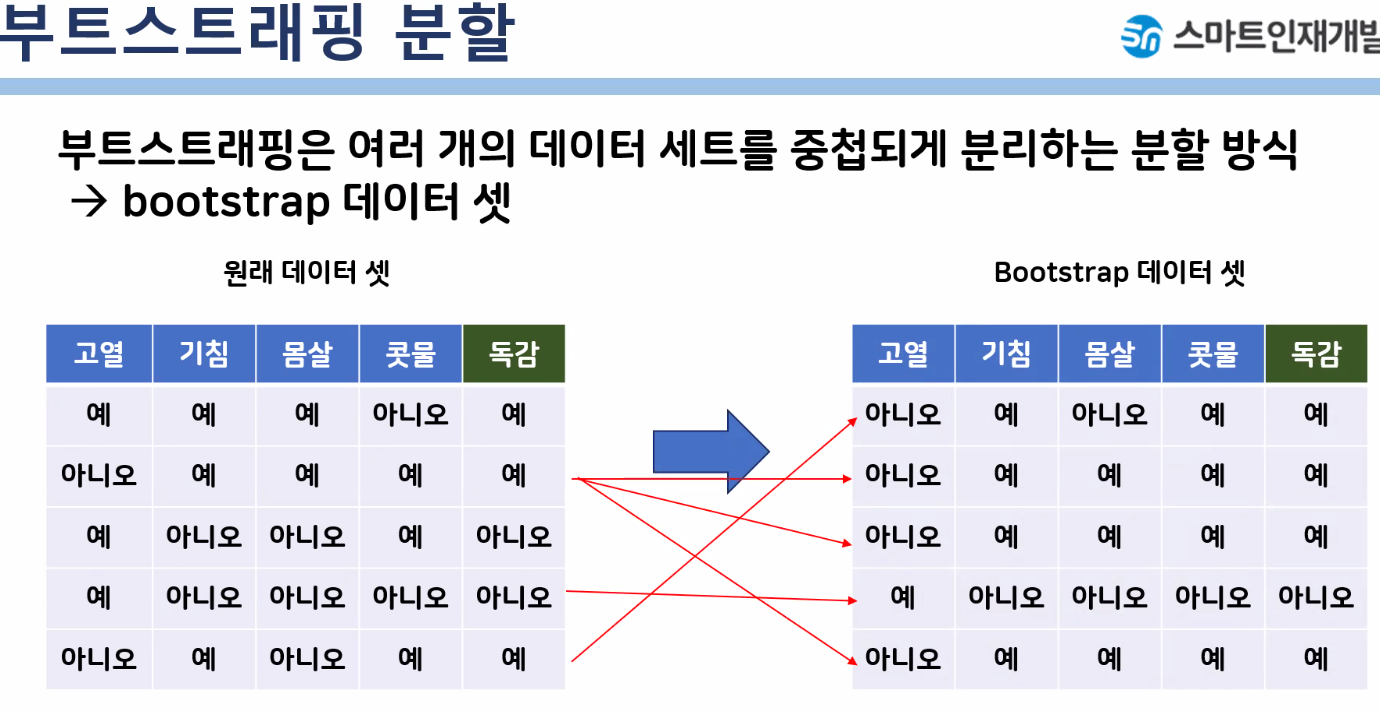
- `랜덤포레스트` 학습 진행

In [6]:
# 랜덤포레스트 모델 생성  # () 안이 비어있으면 기본값으로 지정 # n_estimators -> 몇개의 결정트리를 사용할건지
rf_model = RandomForestClassifier(n_estimators=1000, # 결정 트리의 개수
                              max_depth = 5,      # 트리의 최대 깊이
                              min_samples_leaf=15, # min_samples_leaf -> 리프노드가 되기위한 가질수 있는 최소 샘플 개수
                              max_leaf_nodes=50)   # 리프노드의 최대 개수
rf_model

RandomForestClassifier(max_depth=5, max_leaf_nodes=50, min_samples_leaf=15,
                       n_estimators=1000)

In [152]:
# 교차검증 확인

# 스케일 조정 -> 두개의 거리를 비교할때만 필요 (예 ) knn_model)

# 랜덤포레스트 모델 -> 각각 데이터의 특성을 보는 것이기 때문에 스케일 조정 필요없음
result = cross_val_score(rf_model,
                    X_train,
                    y_train,
                    cv=5)
result.mean()

0.8159123721047015

In [147]:
# 학습
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_leaf_nodes=50, min_samples_leaf=15,
                       n_estimators=1000)

In [150]:
# 예측
pre = rf_model.predict(X_test)
pre

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [153]:
# 케글 사이트에 업로드하기

# 답안지 불러오기
result = pd.read_csv('gender_submission.csv')

# 답안지에 값 넣기
result['Survived'] = pre

# csv 파일로 추출
result.to_csv('rf_model.csv', index = False)

Voting
- 서로 `다른 모델`을 결합하여 투표를 통해 최종 예측 결과를 결정하는 방식

In [216]:
# 서로 다른 3개의 모델 생성
knn_model = KNeighborsClassifier(n_neighbors=15)
tree_model = DecisionTreeClassifier(max_depth=4)
forest_model = RandomForestClassifier(n_estimators=1000,
                              max_depth = 4,    
                              min_samples_leaf=15, 
                              max_leaf_nodes=60)

In [217]:
# 서로 다른 모델들을 결합한 voting_model 생성
voting_model = VotingClassifier(
                                            estimators = [
                                                ('knn', knn_model),
                                                ('tree', tree_model),
                                                ('forest', forest_model)
                                            ],
                                            voting = 'soft' # (Hard Voting - 다수결 vs Soft Voting - 확률)
                                        )

In [218]:
# 교차검증확인
result = cross_val_score(voting_model,
                   X_train,
                   y_train,
                   cv = 5)
result.mean()

0.8125918021467579

In [219]:
# 학습
voting_model.fit(X_train, y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=15)),
                             ('tree', DecisionTreeClassifier(max_depth=4)),
                             ('forest',
                              RandomForestClassifier(max_depth=4,
                                                     max_leaf_nodes=60,
                                                     min_samples_leaf=15,
                                                     n_estimators=1000))],
                 voting='soft')

In [220]:
# 예측
pre = voting_model.predict(X_test)
pre

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [221]:
# 정답제출
result = pd.read_csv('gender_submission.csv')

result['Survived'] = pre

result.to_csv('voting_model.csv' , index = False)

Boosting
- 성능이 안 좋은 약한 학습자(weak learner)들을 합쳐서 성능을 극대화하는 방법
- `에(이)다부스트(AdaBoost)`로 학습 진행
#### AdaBoost
- `지니불순도`를 이용해 나누고, 잘못분류된 것들에 가중치주고, 나누고...
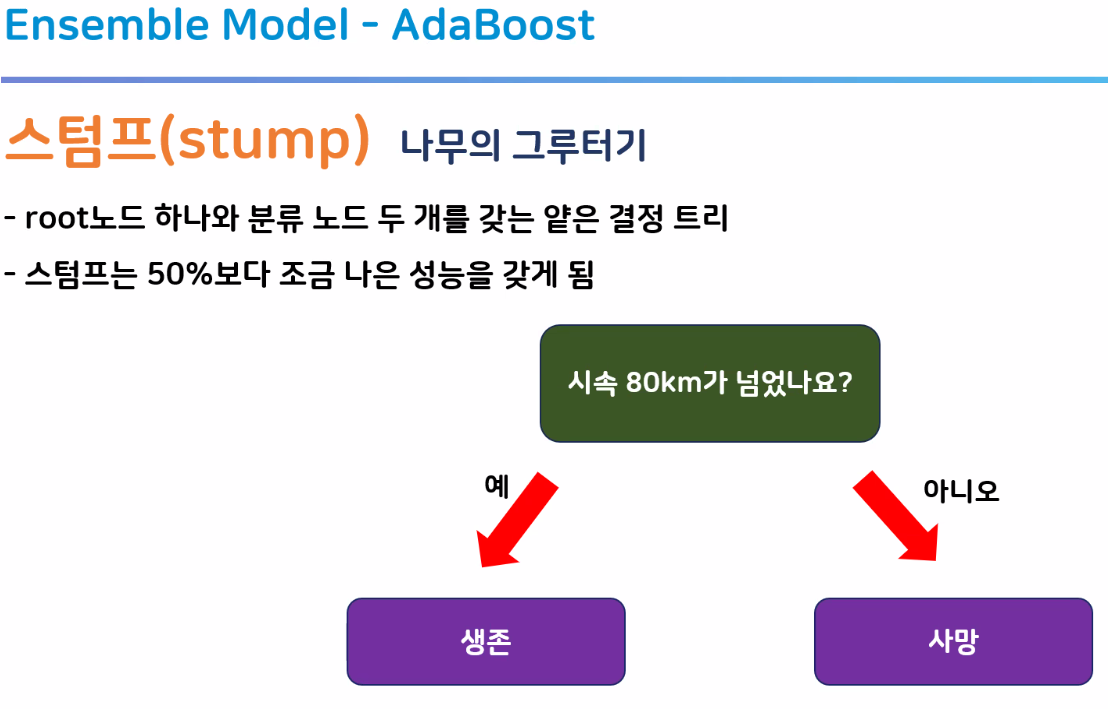
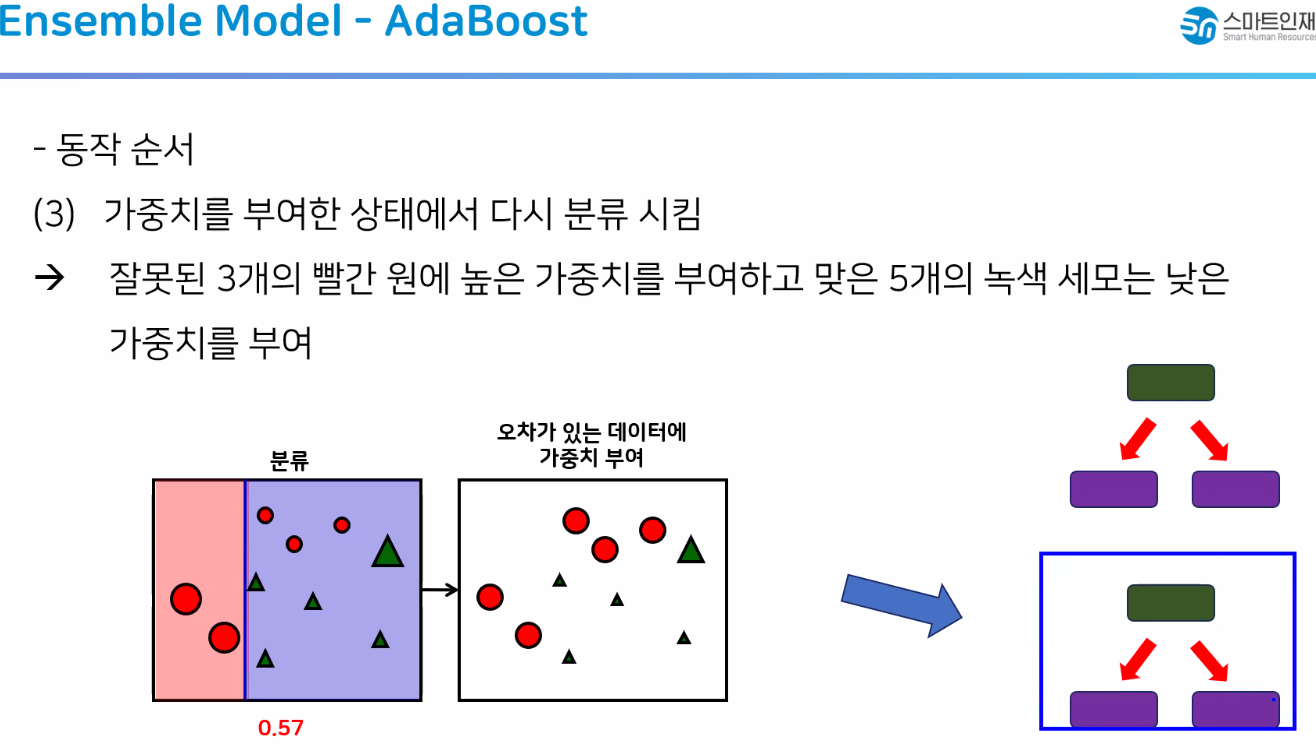
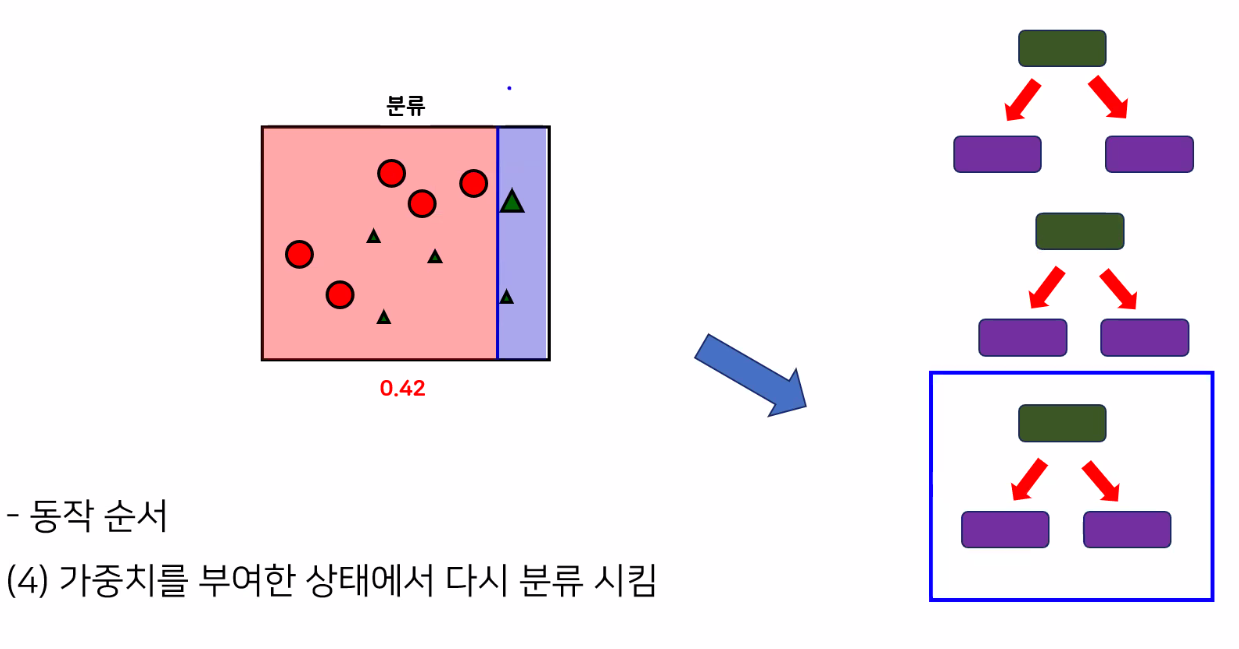
- 계속 스텀프가 늘어남...
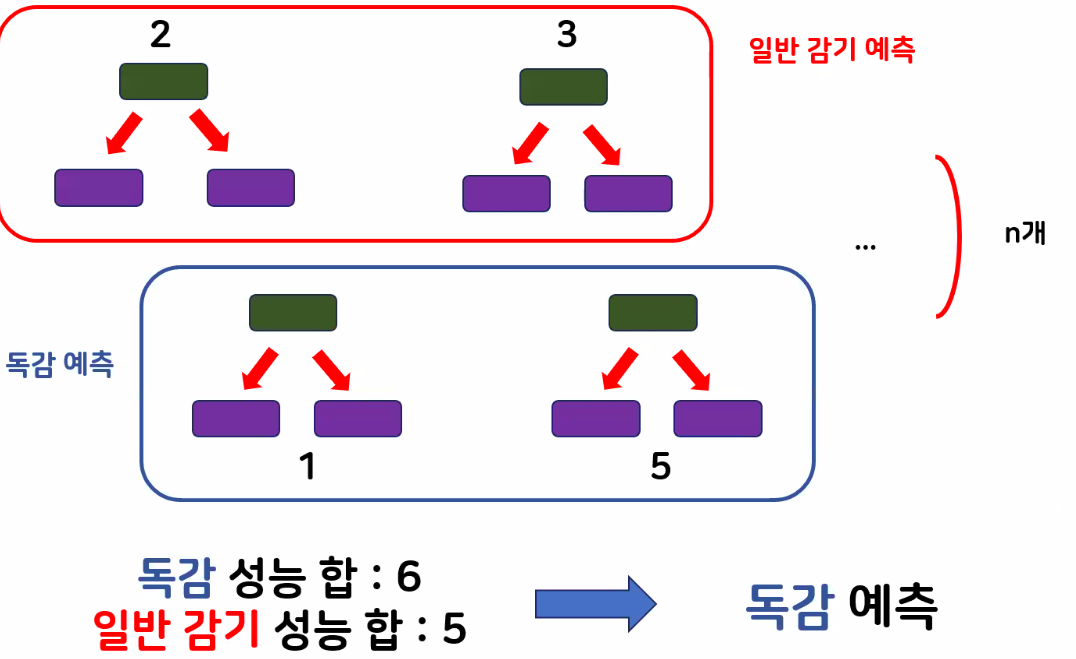
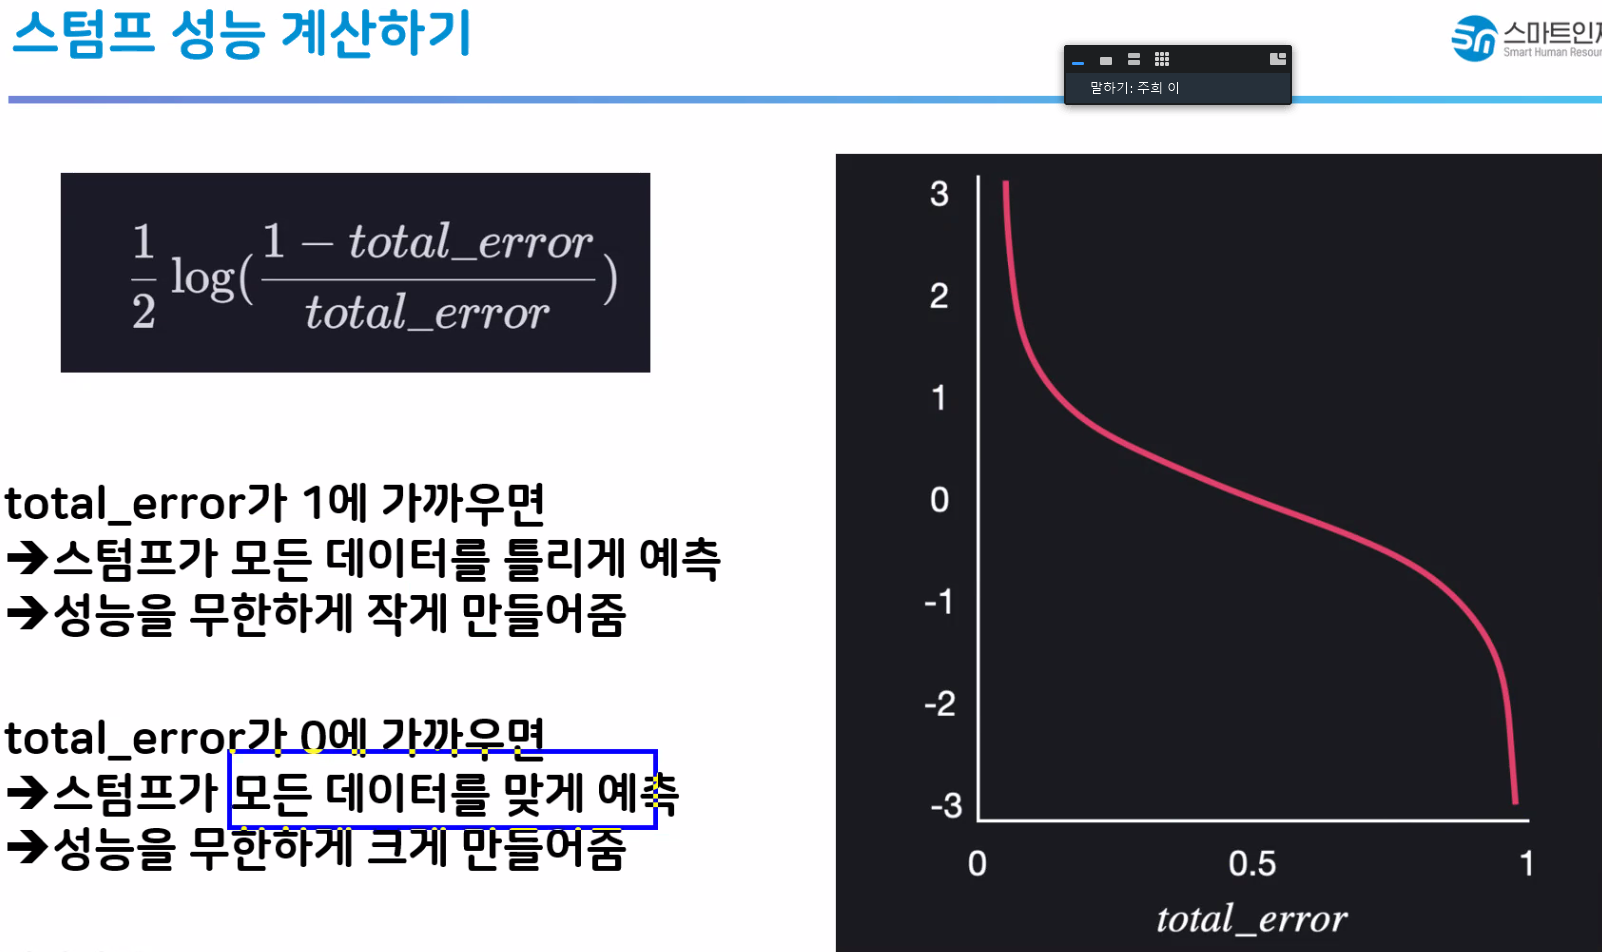
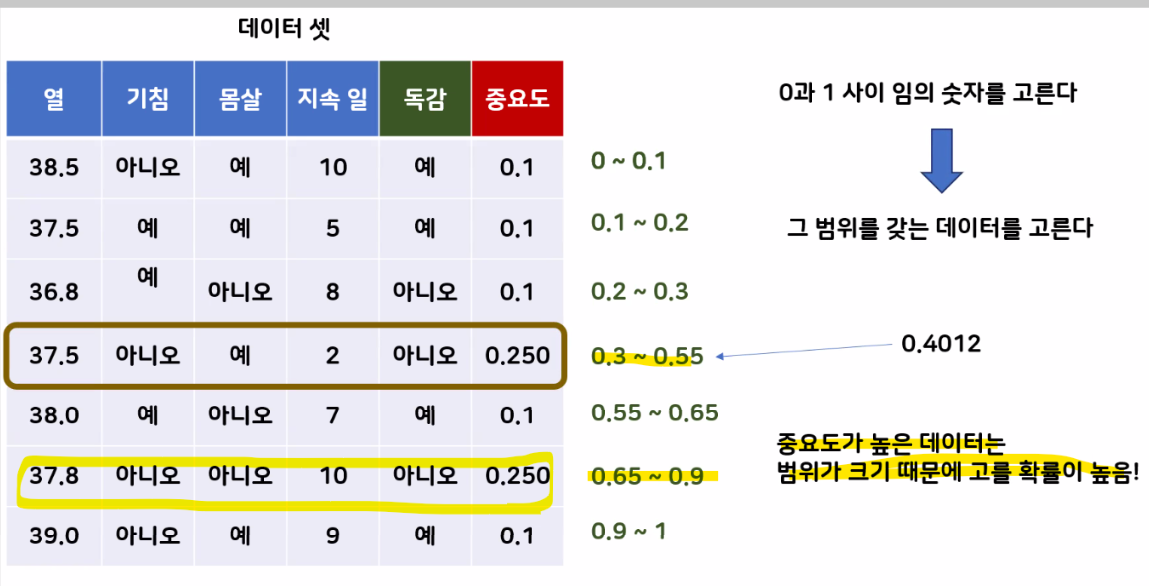
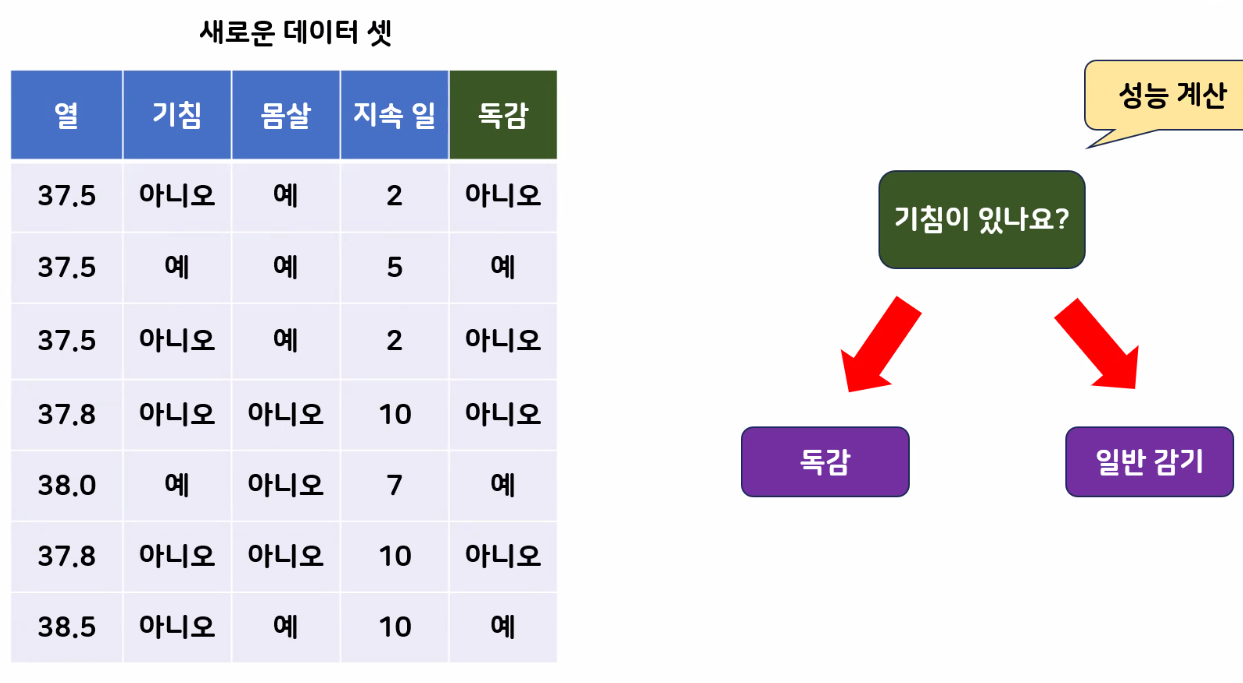
이 행위를 반복

In [229]:
# AdaBoost 모델생성
# n_estimators = 100으로 설정
ada_model = AdaBoostClassifier(n_estimators=100)

In [233]:
# 교차검증
result = cross_val_score(ada_model,
                   X_train,
                    y_train,
                   cv=5)
result.mean()

0.8058690603226415

In [231]:
# 학습
ada_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [232]:
# 예측
pre = ada_model.predict(X_test)
pre

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

### 그리드서치(GridSearch)

In [239]:
from sklearn.model_selection import GridSearchCV

In [235]:
param_grid = {
    'max_depth' : [5,10,15,20],
    'n_estimators' : [1000,1500,2000,2500],
    'min_samples_leaf' : [10,30,50],
    'max_leaf_nodes' : [20, 50, 80]
}

In [236]:
grid = GridSearchCV(rf_model,
                param_grid,
                cv = 3)

In [237]:
grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_depth=5, max_leaf_nodes=50,
                                              min_samples_leaf=15,
                                              n_estimators=1000),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'max_leaf_nodes': [20, 50, 80],
                         'min_samples_leaf': [10, 30, 50],
                         'n_estimators': [1000, 1500, 2000, 2500]})

In [252]:
# best_score 메서드
# best_params 메서드
print(grid.best_score_) # cv = 3이여서 교차검증을 3번 돌렸을때 가장 높은 점수
print(grid.best_params_) # 넣었던 파라미터들 중에서 가장 높은 점수를 냈을 때의 경우
"""
0.830527497194164
{'max_depth': 20, 'max_leaf_nodes': 20, 'min_samples_leaf': 10, 'n_estimators': 1500}"""

0.830527497194164
{'max_depth': 20, 'max_leaf_nodes': 20, 'min_samples_leaf': 10, 'n_estimators': 1500}


"\n0.830527497194164\n{'max_depth': 20, 'max_leaf_nodes': 20, 'min_samples_leaf': 10, 'n_estimators': 1500}"

- best params에 맞춰 모델 생성

In [256]:
# 모델 생성 ( 하이퍼 파라미터 조정)
# {'max_depth': 20, 'max_leaf_nodes': 20, 'min_samples_leaf': 10, 'n_estimators': 1500}
final_rf_model = RandomForestClassifier(max_depth=20, max_leaf_nodes=20, min_samples_leaf=10, n_estimators=1500)

In [258]:
# 교차검증
result = cross_val_score(final_rf_model,
                                X_train,
                                y_train,
                                cv=5)
result.mean()

0.8271483271608814

In [259]:
# 학습
final_rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, max_leaf_nodes=20, min_samples_leaf=10,
                       n_estimators=1500)

In [261]:
# 예측
pre = final_rf_model.predict(X_test)
pre

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,